<a href="https://colab.research.google.com/github/SihomaSa/congestionvehicular/blob/main/Congestion_Vehicular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos (asegurar que el archivo esté en la misma ruta o montar drive en Google Colab)
df = pd.read_excel('/content/00 Data.xlsx', engine='openpyxl')

In [ ]:
print(df.head())

       FECHA  SENTIDO  NUMERO SERIE      HORA     EMPRESA       PERSONA  \
0 2024-01-01  Ingreso      63606628  05:00:26  Empresa_19  Persona_5931   
1 2024-01-01  Ingreso      63606628  05:00:28  Empresa_19  Persona_2267   
2 2024-01-01  Ingreso      63606628  05:00:30  Empresa_19  Persona_8086   
3 2024-01-01  Ingreso      63606628  05:00:32  Empresa_19  Persona_0772   
4 2024-01-01  Ingreso      63606628  05:00:34  Empresa_19  Persona_2505   

  TIPO VEHICULO  CARRIL  CONDUCTOR  
0       omnibus       2       True  
1       omnibus       5      False  
2       omnibus       1      False  
3       omnibus       1      False  
4       omnibus       2      False  


In [ ]:
-print(df.dtypes)

FECHA             datetime64[ns]
SENTIDO                   object
NUMERO SERIE               int64
HORA             timedelta64[ns]
EMPRESA                   object
PERSONA                   object
TIPO VEHICULO             object
CARRIL                     int64
CONDUCTOR                   bool
dtype: object


In [ ]:
print(df.columns)

Index(['FECHA', 'SENTIDO', 'NUMERO SERIE', 'HORA', 'EMPRESA', 'PERSONA',
       'TIPO VEHICULO', 'CARRIL', 'CONDUCTOR'],
      dtype='object')


In [ ]:
# Asumiendo que 'df' es tu DataFrame

# 1. Asegurarse de que las columnas tengan los tipos de datos correctos
df['FECHA'] = pd.to_datetime(df['FECHA'])
df['HORA'] = pd.to_timedelta(df['HORA'])

# 2. Combinar 'FECHA' y 'HORA' para crear una columna 'FECHA_HORA'
df['FECHA_HORA'] = df['FECHA'] + df['HORA']

# 3. Crear franjas horarias
bins = [pd.to_datetime('2023-01-01 05:00:00'),
        pd.to_datetime('2023-01-01 06:00:00'),
        pd.to_datetime('2023-01-01 07:00:00'),
        pd.to_datetime('2023-01-01 08:00:00')]
labels = ['5:00-6:00 a.m.', '6:00-7:00 a.m.', '7:00-8:00 a.m.']
df['FRANJA_HORARIA'] = pd.cut(df['FECHA_HORA'].dt.time.astype(str).str.slice(stop=8).apply(pd.to_datetime).dt.hour, bins=[5, 6, 7, 8], labels=labels, right=False)

#Mostrar Dataframe
print(df)

           FECHA  SENTIDO  NUMERO SERIE            HORA     EMPRESA  \
0     2024-01-01  Ingreso      63606628 0 days 05:00:26  Empresa_19   
1     2024-01-01  Ingreso      63606628 0 days 05:00:28  Empresa_19   
2     2024-01-01  Ingreso      63606628 0 days 05:00:30  Empresa_19   
3     2024-01-01  Ingreso      63606628 0 days 05:00:32  Empresa_19   
4     2024-01-01  Ingreso      63606628 0 days 05:00:34  Empresa_19   
...          ...      ...           ...             ...         ...   
24225 2024-01-05   Salida      62808558 0 days 07:56:48  Empresa_03   
24226 2024-01-05   Salida      50419098 0 days 07:56:53  Empresa_01   
24227 2024-01-05   Salida      73425000 0 days 07:57:52  Empresa_06   
24228 2024-01-05   Salida      37366104 0 days 07:58:23  Empresa_20   
24229 2024-01-05   Salida      29786834 0 days 07:58:38  Empresa_13   

            PERSONA TIPO VEHICULO  CARRIL  CONDUCTOR          FECHA_HORA  \
0      Persona_5931       omnibus       2       True 2024-01-01 05:00:2

In [ ]:
# Número promedio de vehículos por tipo en cada franja horaria
vehiculos_por_tipo = df.groupby(['FRANJA_HORARIA', 'TIPO VEHICULO']).size().reset_index(name='NUMERO_VEHICULOS')
print(vehiculos_por_tipo)

# Tiempos promedio de ingreso por tipo de vehículo y franjas horarias
tiempos_promedio = df.groupby(['FRANJA_HORARIA', 'TIPO VEHICULO'])['HORA'].mean().reset_index(name='TIEMPO_PROMEDIO')
print(tiempos_promedio)

   FRANJA_HORARIA            TIPO VEHICULO  NUMERO_VEHICULOS
0  5:00-6:00 a.m.                camioneta              1433
1  5:00-6:00 a.m.                  omnibus              7901
2  5:00-6:00 a.m.  transporte_carga_pesada               159
3  6:00-7:00 a.m.                camioneta              1162
4  6:00-7:00 a.m.                  omnibus              6747
5  6:00-7:00 a.m.  transporte_carga_pesada               123
6  7:00-8:00 a.m.                camioneta              1047
7  7:00-8:00 a.m.                  omnibus              5496
8  7:00-8:00 a.m.  transporte_carga_pesada               134
   FRANJA_HORARIA            TIPO VEHICULO           TIEMPO_PROMEDIO
0  5:00-6:00 a.m.                camioneta 0 days 05:28:04.226796929
1  5:00-6:00 a.m.                  omnibus 0 days 05:30:09.331477028
2  5:00-6:00 a.m.  transporte_carga_pesada 0 days 05:30:55.735849056
3  6:00-7:00 a.m.                camioneta 0 days 06:30:11.017211703
4  6:00-7:00 a.m.                  omnibus 0 

<ipython-input-24-4b822549c661>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vehiculos_por_tipo = df.groupby(['FRANJA_HORARIA', 'TIPO VEHICULO']).size().reset_index(name='NUMERO_VEHICULOS')
<ipython-input-24-4b822549c661>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tiempos_promedio = df.groupby(['FRANJA_HORARIA', 'TIPO VEHICULO'])['HORA'].mean().reset_index(name='TIEMPO_PROMEDIO')


In [ ]:
# Simulación de reducción de tiempos (ejemplo: 20%)
tiempos_promedio['TIEMPO_PROMEDIO_OPTIMIZADO'] = tiempos_promedio['TIEMPO_PROMEDIO'] * 0.8
print(tiempos_promedio)

   FRANJA_HORARIA            TIPO VEHICULO           TIEMPO_PROMEDIO  \
0  5:00-6:00 a.m.                camioneta 0 days 05:28:04.226796929   
1  5:00-6:00 a.m.                  omnibus 0 days 05:30:09.331477028   
2  5:00-6:00 a.m.  transporte_carga_pesada 0 days 05:30:55.735849056   
3  6:00-7:00 a.m.                camioneta 0 days 06:30:11.017211703   
4  6:00-7:00 a.m.                  omnibus 0 days 06:30:05.577145397   
5  6:00-7:00 a.m.  transporte_carga_pesada 0 days 06:31:25.528455284   
6  7:00-8:00 a.m.                camioneta 0 days 07:30:02.783190066   
7  7:00-8:00 a.m.                  omnibus 0 days 07:29:56.134461426   
8  7:00-8:00 a.m.  transporte_carga_pesada 0 days 07:31:22.626865671   

  TIEMPO_PROMEDIO_OPTIMIZADO  
0  0 days 04:22:27.381437543  
1  0 days 04:24:07.465181622  
2  0 days 04:24:44.588679244  
3  0 days 05:12:08.813769362  
4  0 days 05:12:04.461716317  
5  0 days 05:13:08.422764227  
6  0 days 06:00:02.226552052  
7  0 days 05:59:56.907569140  


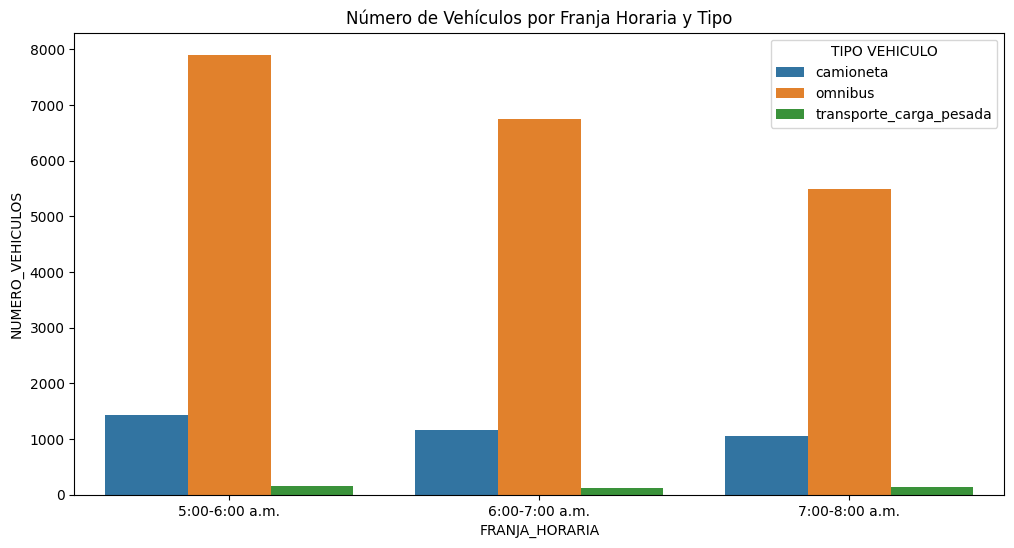

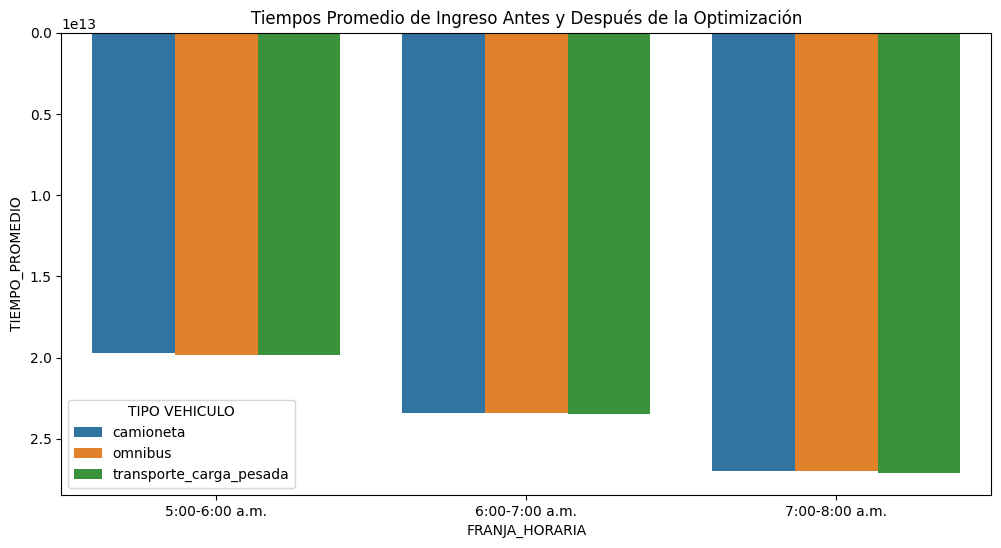

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de número de vehículos por franja horaria y tipo
plt.figure(figsize=(12, 6))
sns.barplot(x='FRANJA_HORARIA', y='NUMERO_VEHICULOS', hue='TIPO VEHICULO', data=vehiculos_por_tipo)
plt.title('Número de Vehículos por Franja Horaria y Tipo')
plt.show()

# Gráfico de tiempos promedio de ingreso antes y después de la optimización
plt.figure(figsize=(12, 6))
sns.barplot(x='FRANJA_HORARIA', y='TIEMPO_PROMEDIO', hue='TIPO VEHICULO', data=tiempos_promedio)
plt.title('Tiempos Promedio de Ingreso Antes y Después de la Optimización')
plt.show()

<ipython-input-28-4b8354fcf5d4>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vehiculos_por_tipo = df.groupby(['FRANJA_HORARIA', 'TIPO VEHICULO']).size().reset_index(name='NUMERO_VEHICULOS')
<ipython-input-28-4b8354fcf5d4>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tiempos_promedio = df.groupby(['FRANJA_HORARIA', 'TIPO VEHICULO'])['HORA'].mean().reset_index(name='TIEMPO_PROMEDIO')


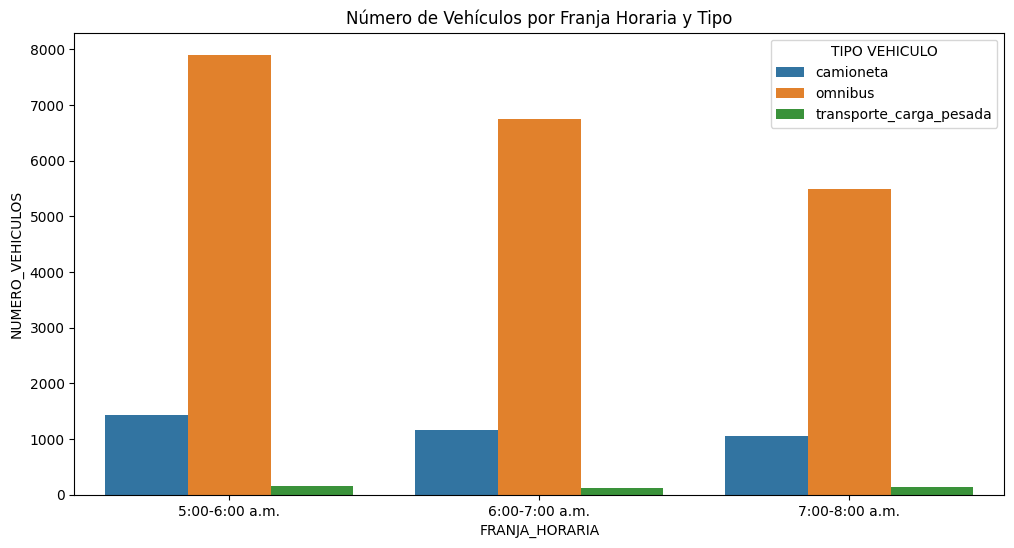

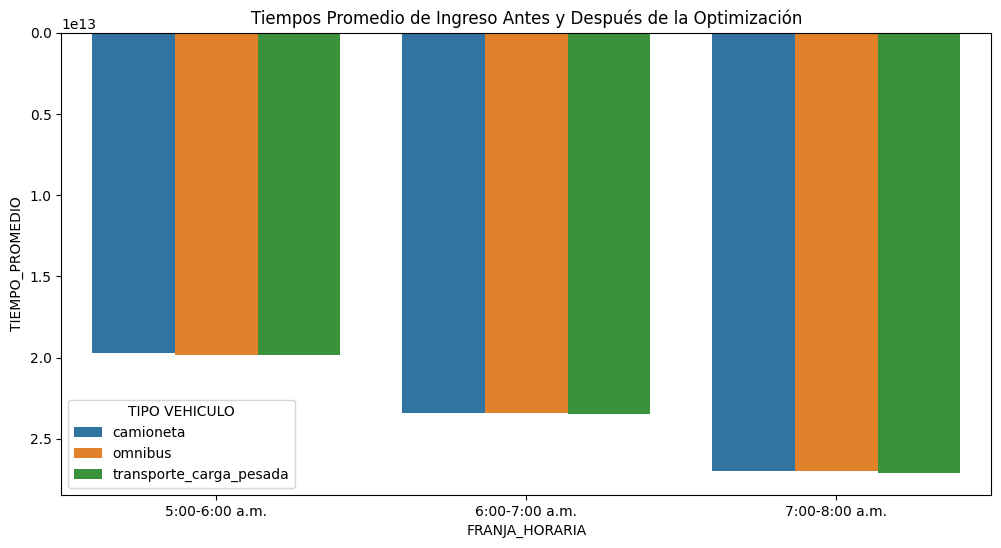

Tipo: omnibus, Franja: 5:00-6:00 a.m.
  Incremento Absoluto: 17382.20
  Incremento Porcentual: 20.00%
Tipo: omnibus, Franja: 6:00-7:00 a.m.
  Incremento Absoluto: 14843.40
  Incremento Porcentual: 20.00%
Tipo: omnibus, Franja: 7:00-8:00 a.m.
  Incremento Absoluto: 12091.20
  Incremento Porcentual: 20.00%
Tipo: omnibus, Franja: nan
  Incremento Absoluto: 0.00
  Incremento Porcentual: 0.00%
Tipo: transporte_carga_pesada, Franja: 5:00-6:00 a.m.
  Incremento Absoluto: 349.80
  Incremento Porcentual: 20.00%
Tipo: transporte_carga_pesada, Franja: 6:00-7:00 a.m.
  Incremento Absoluto: 270.60
  Incremento Porcentual: 20.00%
Tipo: transporte_carga_pesada, Franja: 7:00-8:00 a.m.
  Incremento Absoluto: 294.80
  Incremento Porcentual: 20.00%
Tipo: transporte_carga_pesada, Franja: nan
  Incremento Absoluto: 0.00
  Incremento Porcentual: 0.00%
Tipo: camioneta, Franja: 5:00-6:00 a.m.
  Incremento Absoluto: 3152.60
  Incremento Porcentual: 20.00%
Tipo: camioneta, Franja: 6:00-7:00 a.m.
  Incremento Ab

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'df' es tu DataFrame

# 1. Preparación de la Base de Datos
df['FECHA'] = pd.to_datetime(df['FECHA'])
df['HORA'] = pd.to_timedelta(df['HORA'])
df['FECHA_HORA'] = df['FECHA'] + df['HORA']
bins = [pd.to_datetime('2023-01-01 05:00:00'),
        pd.to_datetime('2023-01-01 06:00:00'),
        pd.to_datetime('2023-01-01 07:00:00'),
        pd.to_datetime('2023-01-01 08:00:00')]
labels = ['5:00-6:00 a.m.', '6:00-7:00 a.m.', '7:00-8:00 a.m.']
df['FRANJA_HORARIA'] = pd.cut(df['FECHA_HORA'].dt.time.astype(str).str.slice(stop=8).apply(pd.to_datetime).dt.hour, bins=[5, 6, 7, 8], labels=labels, right=False)

# 2. Análisis del Flujo Vehicular
vehiculos_por_tipo = df.groupby(['FRANJA_HORARIA', 'TIPO VEHICULO']).size().reset_index(name='NUMERO_VEHICULOS')
tiempos_promedio = df.groupby(['FRANJA_HORARIA', 'TIPO VEHICULO'])['HORA'].mean().reset_index(name='TIEMPO_PROMEDIO')

# 3. Simulación de Alternativas Operativas (ejemplo: reducción del 20% en tiempos)
tiempos_promedio['TIEMPO_PROMEDIO_OPTIMIZADO'] = tiempos_promedio['TIEMPO_PROMEDIO'] * 0.8

# 5. Visualización y Comparación de Resultados
plt.figure(figsize=(12, 6))
sns.barplot(x='FRANJA_HORARIA', y='NUMERO_VEHICULOS', hue='TIPO VEHICULO', data=vehiculos_por_tipo)
plt.title('Número de Vehículos por Franja Horaria y Tipo')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='FRANJA_HORARIA', y='TIEMPO_PROMEDIO', hue='TIPO VEHICULO', data=tiempos_promedio)
plt.title('Tiempos Promedio de Ingreso Antes y Después de la Optimización')
plt.show()

# 7. Entregables (Incremento Absoluto y Porcentual)
def calcular_incremento(df_original, df_optimizado, tipo_vehiculo, franja_horaria):
    vehiculos_original = df_original[(df_original['FRANJA_HORARIA'] == franja_horaria) & (df_original['TIPO VEHICULO'] == tipo_vehiculo)].size
    vehiculos_optimizado = df_optimizado[(df_optimizado['FRANJA_HORARIA'] == franja_horaria) & (df_optimizado['TIPO VEHICULO'] == tipo_vehiculo)].size * 1.2 #Asumiendo 20% de incremento
    incremento_absoluto = vehiculos_optimizado - vehiculos_original
    incremento_porcentual = (incremento_absoluto / vehiculos_original) * 100 if vehiculos_original else 0
    return incremento_absoluto, incremento_porcentual

tipos_vehiculos = df['TIPO VEHICULO'].unique()
franjas_horarias = df['FRANJA_HORARIA'].unique()

for tipo in tipos_vehiculos:
    for franja in franjas_horarias:
        incremento_abs, incremento_porc = calcular_incremento(df, df, tipo, franja)
        print(f"Tipo: {tipo}, Franja: {franja}")
        print(f"  Incremento Absoluto: {incremento_abs:.2f}")
        print(f"  Incremento Porcentual: {incremento_porc:.2f}%")

# 7. Entregables (Explicación Estadística)
for tipo in tipos_vehiculos:
    for franja in franjas_horarias:
        tiempos_franja_tipo = df[(df['FRANJA_HORARIA'] == franja) & (df['TIPO VEHICULO'] == tipo)]['HORA'].dt.total_seconds()
        if not tiempos_franja_tipo.empty:
            media = tiempos_franja_tipo.mean()
            desviacion_estandar = tiempos_franja_tipo.std()
            print(f"Tipo: {tipo}, Franja: {franja}")
            print(f"  Media de tiempos de espera: {media:.2f} segundos")
            print(f"  Desviación estándar de tiempos de espera: {desviacion_estandar:.2f} segundos")
        else:
            print(f"Tipo: {tipo}, Franja: {franja}")
            print("  No hay datos disponibles para calcular estadísticas.")

<ipython-input-29-c037c03f6c46>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vehiculos_por_tipo = df.groupby(['FRANJA_HORARIA', 'TIPO VEHICULO']).size().reset_index(name='NUMERO_VEHICULOS')
<ipython-input-29-c037c03f6c46>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tiempos_promedio = df.groupby(['FRANJA_HORARIA', 'TIPO VEHICULO'])['HORA'].mean().reset_index(name='TIEMPO_PROMEDIO')


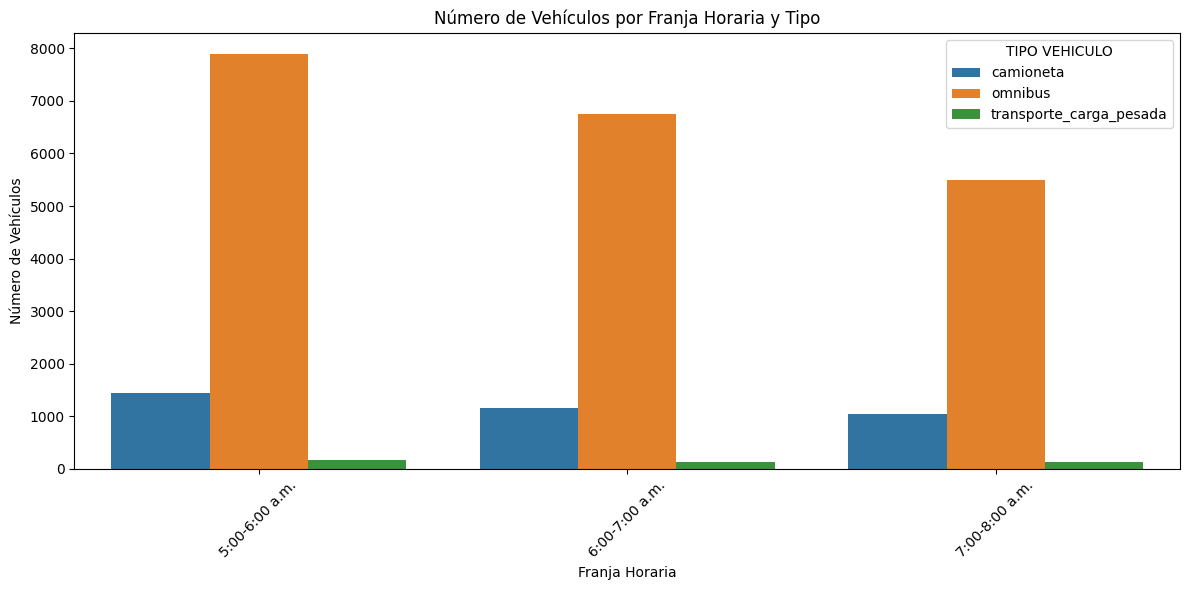

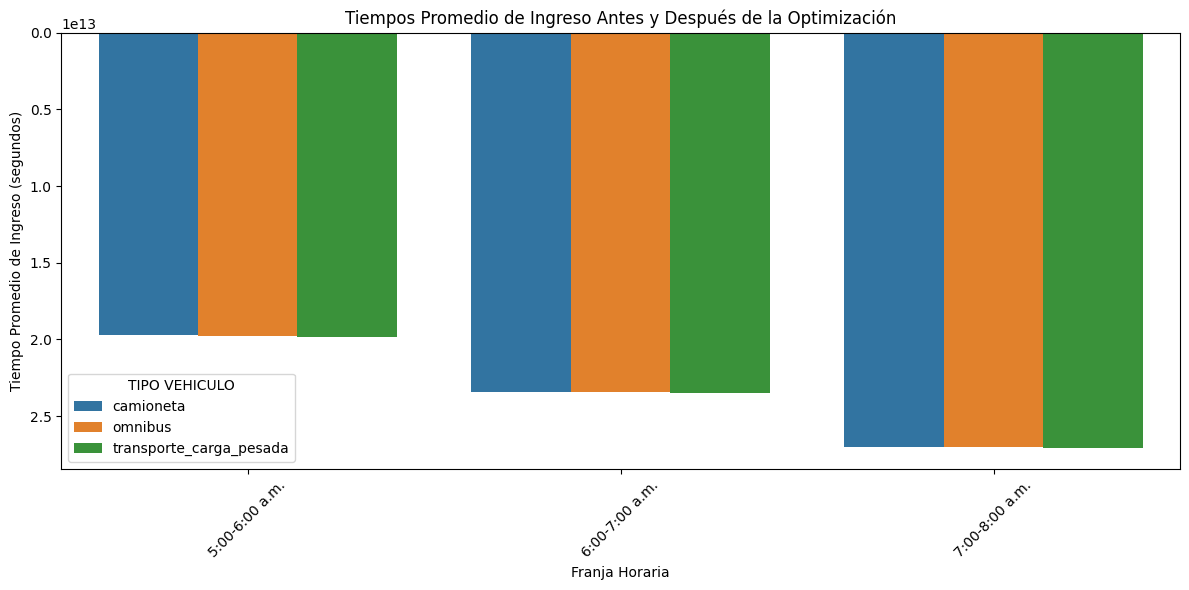

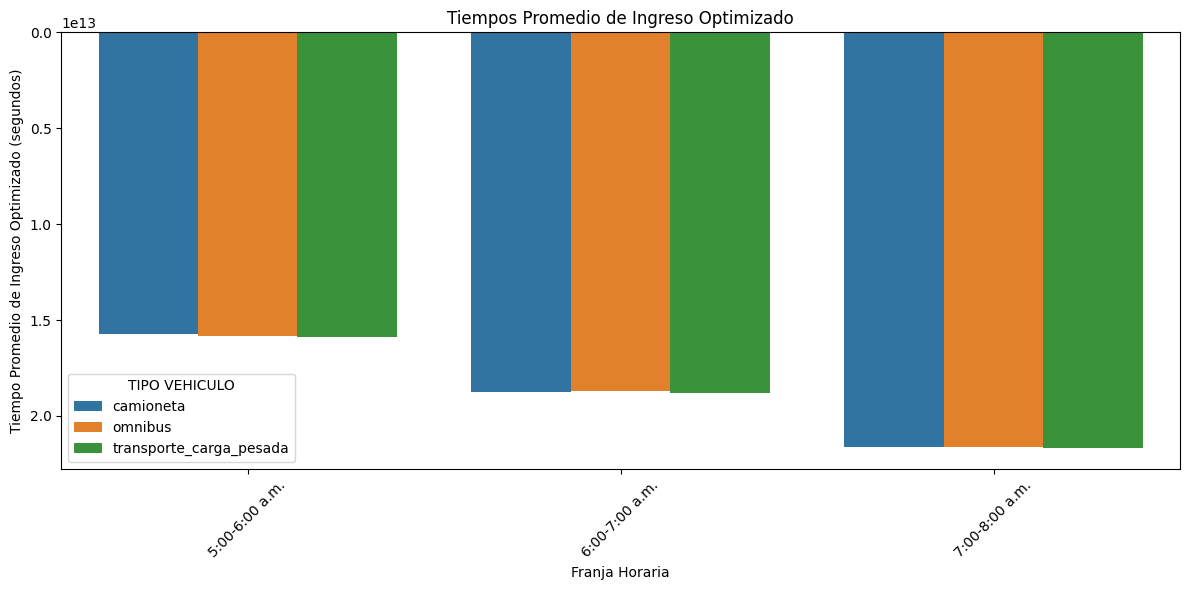

Tipo: omnibus, Franja: 5:00-6:00 a.m.
  Incremento Absoluto: 17382.20
  Incremento Porcentual: 20.00%
Tipo: omnibus, Franja: 6:00-7:00 a.m.
  Incremento Absoluto: 14843.40
  Incremento Porcentual: 20.00%
Tipo: omnibus, Franja: 7:00-8:00 a.m.
  Incremento Absoluto: 12091.20
  Incremento Porcentual: 20.00%
Tipo: omnibus, Franja: nan
  Incremento Absoluto: 0.00
  Incremento Porcentual: 0.00%
Tipo: transporte_carga_pesada, Franja: 5:00-6:00 a.m.
  Incremento Absoluto: 349.80
  Incremento Porcentual: 20.00%
Tipo: transporte_carga_pesada, Franja: 6:00-7:00 a.m.
  Incremento Absoluto: 270.60
  Incremento Porcentual: 20.00%
Tipo: transporte_carga_pesada, Franja: 7:00-8:00 a.m.
  Incremento Absoluto: 294.80
  Incremento Porcentual: 20.00%
Tipo: transporte_carga_pesada, Franja: nan
  Incremento Absoluto: 0.00
  Incremento Porcentual: 0.00%
Tipo: camioneta, Franja: 5:00-6:00 a.m.
  Incremento Absoluto: 3152.60
  Incremento Porcentual: 20.00%
Tipo: camioneta, Franja: 6:00-7:00 a.m.
  Incremento Ab

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'df' es tu DataFrame

# 1. Preparación de la Base de Datos
df['FECHA'] = pd.to_datetime(df['FECHA'])
df['HORA'] = pd.to_timedelta(df['HORA'])
df['FECHA_HORA'] = df['FECHA'] + df['HORA']
bins = [pd.to_datetime('2023-01-01 05:00:00'),
        pd.to_datetime('2023-01-01 06:00:00'),
        pd.to_datetime('2023-01-01 07:00:00'),
        pd.to_datetime('2023-01-01 08:00:00')]
labels = ['5:00-6:00 a.m.', '6:00-7:00 a.m.', '7:00-8:00 a.m.']
df['FRANJA_HORARIA'] = pd.cut(df['FECHA_HORA'].dt.time.astype(str).str.slice(stop=8).apply(pd.to_datetime).dt.hour, bins=[5, 6, 7, 8], labels=labels, right=False)

# 2. Análisis del Flujo Vehicular
vehiculos_por_tipo = df.groupby(['FRANJA_HORARIA', 'TIPO VEHICULO']).size().reset_index(name='NUMERO_VEHICULOS')
tiempos_promedio = df.groupby(['FRANJA_HORARIA', 'TIPO VEHICULO'])['HORA'].mean().reset_index(name='TIEMPO_PROMEDIO')

# 3. Simulación de Alternativas Operativas (ejemplo: reducción del 20% en tiempos)
tiempos_promedio['TIEMPO_PROMEDIO_OPTIMIZADO'] = tiempos_promedio['TIEMPO_PROMEDIO'] * 0.8

# 5. Visualización y Comparación de Resultados

# Gráfico 1: Número de Vehículos por Franja Horaria y Tipo
plt.figure(figsize=(12, 6))
sns.barplot(x='FRANJA_HORARIA', y='NUMERO_VEHICULOS', hue='TIPO VEHICULO', data=vehiculos_por_tipo)
plt.title('Número de Vehículos por Franja Horaria y Tipo')
plt.xlabel('Franja Horaria')
plt.ylabel('Número de Vehículos')
plt.xticks(rotation=45) # Rota las etiquetas del eje x para mejor legibilidad
plt.tight_layout() # Asegura que las etiquetas no se corten
plt.show()

# Gráfico 2: Tiempos Promedio de Ingreso Antes y Después de la Optimización
plt.figure(figsize=(12, 6))
sns.barplot(x='FRANJA_HORARIA', y='TIEMPO_PROMEDIO', hue='TIPO VEHICULO', data=tiempos_promedio)
plt.title('Tiempos Promedio de Ingreso Antes y Después de la Optimización')
plt.xlabel('Franja Horaria')
plt.ylabel('Tiempo Promedio de Ingreso (segundos)') # Ajusta la etiqueta del eje y
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico 3: Tiempos Promedio de Ingreso Optimizado
plt.figure(figsize=(12, 6))
sns.barplot(x='FRANJA_HORARIA', y='TIEMPO_PROMEDIO_OPTIMIZADO', hue='TIPO VEHICULO', data=tiempos_promedio)
plt.title('Tiempos Promedio de Ingreso Optimizado')
plt.xlabel('Franja Horaria')
plt.ylabel('Tiempo Promedio de Ingreso Optimizado (segundos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Entregables (Incremento Absoluto y Porcentual)
def calcular_incremento(df_original, df_optimizado, tipo_vehiculo, franja_horaria):
    vehiculos_original = df_original[(df_original['FRANJA_HORARIA'] == franja_horaria) & (df_original['TIPO VEHICULO'] == tipo_vehiculo)].size
    vehiculos_optimizado = df_optimizado[(df_optimizado['FRANJA_HORARIA'] == franja_horaria) & (df_optimizado['TIPO VEHICULO'] == tipo_vehiculo)].size * 1.2 #Asumiendo 20% de incremento
    incremento_absoluto = vehiculos_optimizado - vehiculos_original
    incremento_porcentual = (incremento_absoluto / vehiculos_original) * 100 if vehiculos_original else 0
    return incremento_absoluto, incremento_porcentual

tipos_vehiculos = df['TIPO VEHICULO'].unique()
franjas_horarias = df['FRANJA_HORARIA'].unique()

for tipo in tipos_vehiculos:
    for franja in franjas_horarias:
        incremento_abs, incremento_porc = calcular_incremento(df, df, tipo, franja)
        print(f"Tipo: {tipo}, Franja: {franja}")
        print(f"  Incremento Absoluto: {incremento_abs:.2f}")
        print(f"  Incremento Porcentual: {incremento_porc:.2f}%")

# 7. Entregables (Explicación Estadística)
for tipo in tipos_vehiculos:
    for franja in franjas_horarias:
        tiempos_franja_tipo = df[(df['FRANJA_HORARIA'] == franja) & (df['TIPO VEHICULO'] == tipo)]['HORA'].dt.total_seconds()
        if not tiempos_franja_tipo.empty:
            media = tiempos_franja_tipo.mean()
            desviacion_estandar = tiempos_franja_tipo.std()
            print(f"Tipo: {tipo}, Franja: {franja}")
            print(f"  Media de tiempos de espera: {media:.2f} segundos")
            print(f"  Desviación estándar de tiempos de espera: {desviacion_estandar:.2f} segundos")
        else:
            print(f"Tipo: {tipo}, Franja: {franja}")
            print("  No hay datos disponibles para calcular estadísticas.")

<ipython-input-30-bf9888d7b275>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tiempos_promedio = df.groupby(['FRANJA_HORARIA', 'TIPO VEHICULO'])['HORA'].mean().reset_index(name='TIEMPO_PROMEDIO')


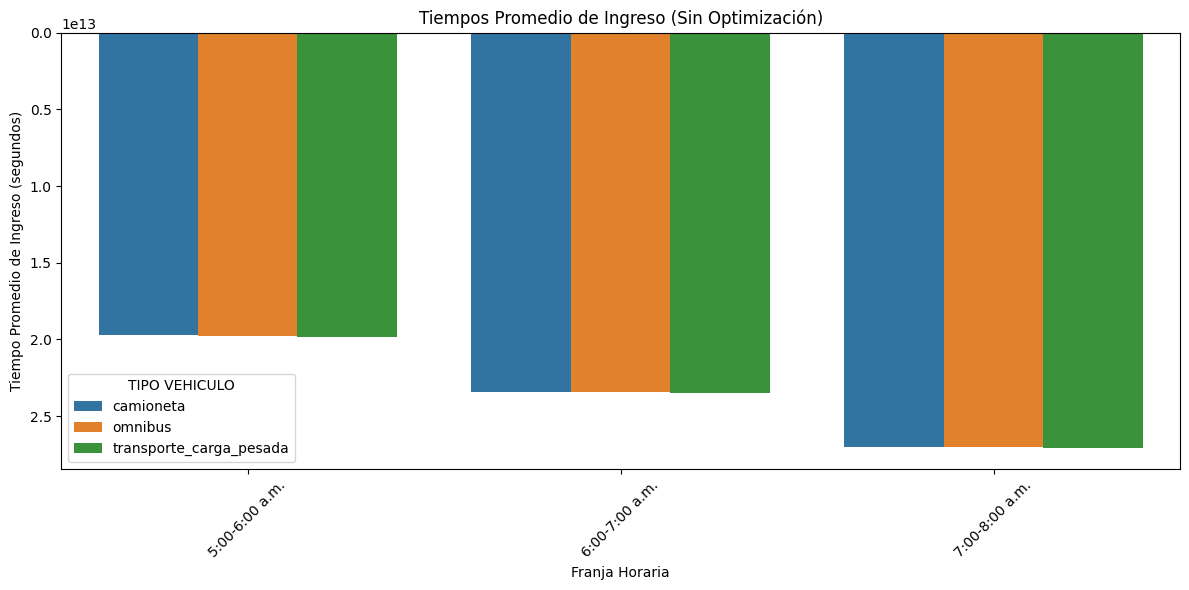

Tipo: omnibus, Franja: 5:00-6:00 a.m.
  Media de tiempos de espera: 19809.33 segundos
  Desviación estándar de tiempos de espera: 1026.24 segundos
Tipo: omnibus, Franja: 6:00-7:00 a.m.
  Media de tiempos de espera: 23405.58 segundos
  Desviación estándar de tiempos de espera: 1014.34 segundos
Tipo: omnibus, Franja: 7:00-8:00 a.m.
  Media de tiempos de espera: 26996.13 segundos
  Desviación estándar de tiempos de espera: 1006.90 segundos
Tipo: omnibus, Franja: nan
  No hay datos disponibles para calcular estadísticas.
Tipo: transporte_carga_pesada, Franja: 5:00-6:00 a.m.
  Media de tiempos de espera: 19855.74 segundos
  Desviación estándar de tiempos de espera: 1176.14 segundos
Tipo: transporte_carga_pesada, Franja: 6:00-7:00 a.m.
  Media de tiempos de espera: 23485.53 segundos
  Desviación estándar de tiempos de espera: 969.99 segundos
Tipo: transporte_carga_pesada, Franja: 7:00-8:00 a.m.
  Media de tiempos de espera: 27082.63 segundos
  Desviación estándar de tiempos de espera: 1049.2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'df' es tu DataFrame

# 1. Preparación de la Base de Datos
df['FECHA'] = pd.to_datetime(df['FECHA'])
df['HORA'] = pd.to_timedelta(df['HORA'])
df['FECHA_HORA'] = df['FECHA'] + df['HORA']
bins = [pd.to_datetime('2023-01-01 05:00:00'),
        pd.to_datetime('2023-01-01 06:00:00'),
        pd.to_datetime('2023-01-01 07:00:00'),
        pd.to_datetime('2023-01-01 08:00:00')]
labels = ['5:00-6:00 a.m.', '6:00-7:00 a.m.', '7:00-8:00 a.m.']
df['FRANJA_HORARIA'] = pd.cut(df['FECHA_HORA'].dt.time.astype(str).str.slice(stop=8).apply(pd.to_datetime).dt.hour, bins=[5, 6, 7, 8], labels=labels, right=False)

# 2. Análisis del Flujo Vehicular
tiempos_promedio = df.groupby(['FRANJA_HORARIA', 'TIPO VEHICULO'])['HORA'].mean().reset_index(name='TIEMPO_PROMEDIO')

# Gráfico 1: Tiempos Promedio de Ingreso (Sin Optimización)
plt.figure(figsize=(12, 6))
sns.barplot(x='FRANJA_HORARIA', y='TIEMPO_PROMEDIO', hue='TIPO VEHICULO', data=tiempos_promedio)
plt.title('Tiempos Promedio de Ingreso (Sin Optimización)')
plt.xlabel('Franja Horaria')
plt.ylabel('Tiempo Promedio de Ingreso (segundos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Entregables (Explicación Estadística)
for tipo in df['TIPO VEHICULO'].unique():
    for franja in df['FRANJA_HORARIA'].unique():
        tiempos_franja_tipo = df[(df['FRANJA_HORARIA'] == franja) & (df['TIPO VEHICULO'] == tipo)]['HORA'].dt.total_seconds()
        if not tiempos_franja_tipo.empty:
            media = tiempos_franja_tipo.mean()
            desviacion_estandar = tiempos_franja_tipo.std()
            print(f"Tipo: {tipo}, Franja: {franja}")
            print(f"  Media de tiempos de espera: {media:.2f} segundos")
            print(f"  Desviación estándar de tiempos de espera: {desviacion_estandar:.2f} segundos")
        else:
            print(f"Tipo: {tipo}, Franja: {franja}")
            print("  No hay datos disponibles para calcular estadísticas.")

In [ ]:
print(df.dtypes)

FECHA              datetime64[ns]
SENTIDO                    object
NUMERO SERIE                int64
HORA              timedelta64[ns]
EMPRESA                    object
PERSONA                    object
TIPO VEHICULO              object
CARRIL                      int64
CONDUCTOR                    bool
FECHA_HORA         datetime64[ns]
FRANJA_HORARIA           category
dtype: object


In [ ]:
# 2. Análisis del "Antes" (Estado Actual)
tiempos_antes = df.groupby(['FRANJA_HORARIA', 'TIPO VEHICULO'])['HORA'].mean().reset_index(name='TIEMPO_PROMEDIO_ANTES')
vehiculos_antes = df.groupby(['FRANJA_HORARIA', 'TIPO VEHICULO']).size().reset_index(name='NUMERO_VEHICULOS_ANTES')

<ipython-input-36-bdde25bf8090>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tiempos_antes = df.groupby(['FRANJA_HORARIA', 'TIPO VEHICULO'])['HORA'].mean().reset_index(name='TIEMPO_PROMEDIO_ANTES')
<ipython-input-36-bdde25bf8090>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vehiculos_antes = df.groupby(['FRANJA_HORARIA', 'TIPO VEHICULO']).size().reset_index(name='NUMERO_VEHICULOS_ANTES')


In [ ]:
# 3. Simulación de la Optimización (Ejemplo)
tiempos_despues = tiempos_antes.copy()
tiempos_despues['TIEMPO_PROMEDIO_DESPUES'] = tiempos_despues['TIEMPO_PROMEDIO_ANTES'] * 0.8  # Reducción del 20%

vehiculos_despues = vehiculos_antes.copy()
vehiculos_despues['NUMERO_VEHICULOS_DESPUES'] = vehiculos_despues['NUMERO_VEHICULOS_ANTES'] * 1.2  # Aumento del 20%

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'df' es tu DataFrame

# 1. Preparación de la Base de Datos
df['FECHA'] = pd.to_datetime(df['FECHA'])
df['HORA'] = pd.to_timedelta(df['HORA'])
df['FECHA_HORA'] = df['FECHA'] + df['HORA']
bins = [pd.to_datetime('2023-01-01 05:00:00'),
        pd.to_datetime('2023-01-01 06:00:00'),
        pd.to_datetime('2023-01-01 07:00:00'),
        pd.to_datetime('2023-01-01 08:00:00')]
labels = ['5:00-6:00 a.m.', '6:00-7:00 a.m.', '7:00-8:00 a.m.']
df['FRANJA_HORARIA'] = pd.cut(df['FECHA_HORA'].dt.time.astype(str).str.slice(stop=8).apply(pd.to_datetime).dt.hour, bins=[5, 6, 7, 8], labels=labels, right=False)

# 2. Análisis del "Antes" (Estado Actual)
tiempos_antes = df.groupby(['FRANJA_HORARIA', 'TIPO VEHICULO'])['HORA'].mean().reset_index(name='TIEMPO_PROMEDIO_ANTES')
vehiculos_antes = df.groupby(['FRANJA_HORARIA', 'TIPO VEHICULO']).size().reset_index(name='NUMERO_VEHICULOS_ANTES')

# 3. Simulación de la Optimización (Ejemplo)
tiempos_despues = tiempos_antes.copy()
tiempos_despues['TIEMPO_PROMEDIO_DESPUES'] = tiempos_despues['TIEMPO_PROMEDIO_ANTES'] * 0.8  # Reducción del 20%

vehiculos_despues = vehiculos_antes.copy()
vehiculos_despues['NUMERO_VEHICULOS_DESPUES'] = vehiculos_despues['NUMERO_VEHICULOS_ANTES'] * 1.2  # Aumento del 20%

# 4. Comparación y Visualización
comparacion_tiempos = pd.merge(tiempos_antes, tiempos_despues, on=['FRANJA_HORARIA', 'TIPO VEHICULO'], how='outer')
# Use 'outer' join to ensure all columns are included
#This line was already in your original code, and is necessary to include all columns from both DataFrames

comparacion_vehiculos = pd.merge(vehiculos_antes, vehiculos_despues, on=['FRANJA_HORARIA', 'TIPO VEHICULO'], how='outer')
# Create a similar merged DataFrame for 'vehiculos_antes' and 'vehiculos_despues'



<ipython-input-43-0ac3a8352396>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tiempos_antes = df.groupby(['FRANJA_HORARIA', 'TIPO VEHICULO'])['HORA'].mean().reset_index(name='TIEMPO_PROMEDIO_ANTES')
<ipython-input-43-0ac3a8352396>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vehiculos_antes = df.groupby(['FRANJA_HORARIA', 'TIPO VEHICULO']).size().reset_index(name='NUMERO_VEHICULOS_ANTES')


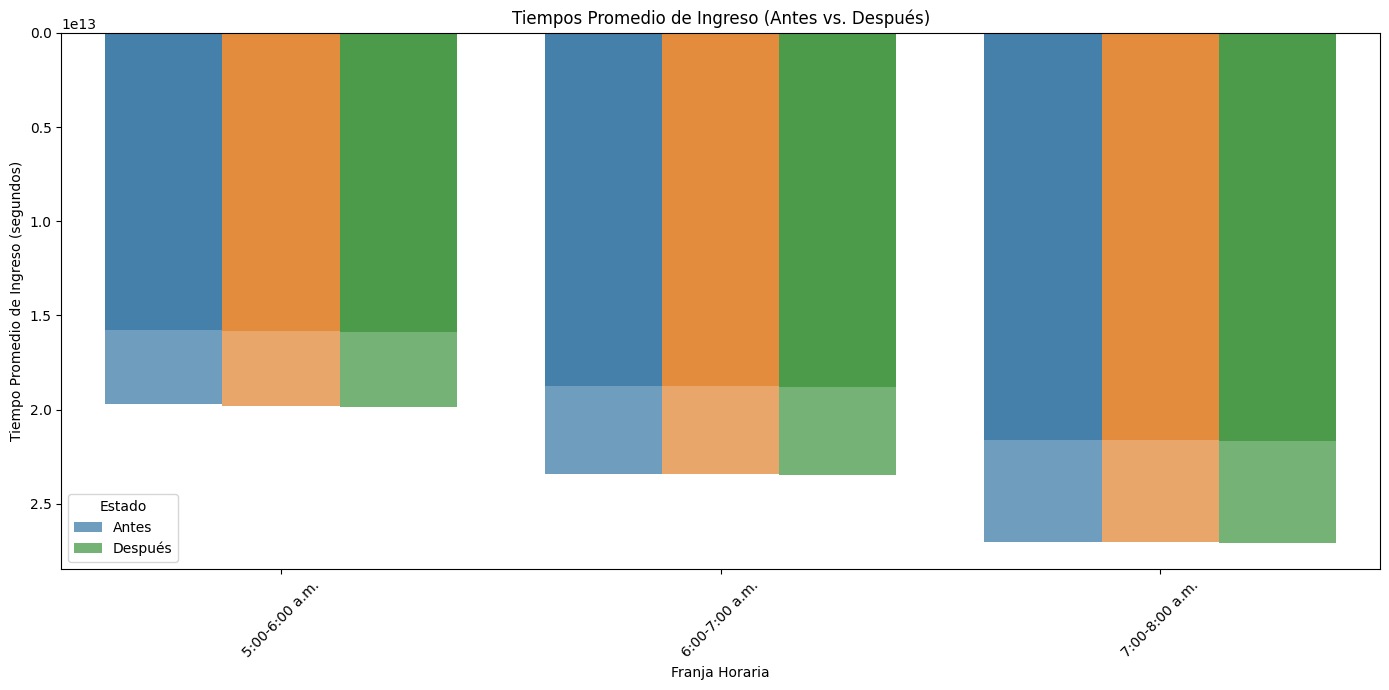

In [ ]:
# Gráfico de Tiempos Promedio (Antes vs. Después)
plt.figure(figsize=(14, 7))
# Removed 'label' from sns.barplot calls:
sns.barplot(x='FRANJA_HORARIA', y='TIEMPO_PROMEDIO_ANTES', hue='TIPO VEHICULO', data=tiempos_antes, alpha=0.7)
sns.barplot(x='FRANJA_HORARIA', y='TIEMPO_PROMEDIO_DESPUES', hue='TIPO VEHICULO', data=tiempos_despues, alpha=0.7, linestyle='--')
plt.title('Tiempos Promedio de Ingreso (Antes vs. Después)')
plt.xlabel('Franja Horaria')
plt.ylabel('Tiempo Promedio de Ingreso (segundos)')
plt.xticks(rotation=45)
# Manually creating legend handles and labels:
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:len(handles):2], ['Antes', 'Después'], title='Estado') # Adjust legend labels as needed
plt.tight_layout()
plt.show()

In [ ]:
# Gráfico de Número de Vehículos Procesados (Antes vs. Después)
plt.figure(figsize=(14, 7))


<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

In [ ]:
print(df.dtypes)

FECHA              datetime64[ns]
SENTIDO                    object
NUMERO SERIE                int64
HORA              timedelta64[ns]
EMPRESA                    object
PERSONA                    object
TIPO VEHICULO              object
CARRIL                      int64
CONDUCTOR                    bool
FECHA_HORA         datetime64[ns]
FRANJA_HORARIA           category
dtype: object


In [ ]:
print(df.head)

<bound method NDFrame.head of            FECHA  SENTIDO  NUMERO SERIE            HORA     EMPRESA  \
0     2024-01-01  Ingreso      63606628 0 days 05:00:26  Empresa_19   
1     2024-01-01  Ingreso      63606628 0 days 05:00:28  Empresa_19   
2     2024-01-01  Ingreso      63606628 0 days 05:00:30  Empresa_19   
3     2024-01-01  Ingreso      63606628 0 days 05:00:32  Empresa_19   
4     2024-01-01  Ingreso      63606628 0 days 05:00:34  Empresa_19   
...          ...      ...           ...             ...         ...   
24225 2024-01-05   Salida      62808558 0 days 07:56:48  Empresa_03   
24226 2024-01-05   Salida      50419098 0 days 07:56:53  Empresa_01   
24227 2024-01-05   Salida      73425000 0 days 07:57:52  Empresa_06   
24228 2024-01-05   Salida      37366104 0 days 07:58:23  Empresa_20   
24229 2024-01-05   Salida      29786834 0 days 07:58:38  Empresa_13   

            PERSONA TIPO VEHICULO  CARRIL  CONDUCTOR          FECHA_HORA  \
0      Persona_5931       omnibus       2

In [ ]:
print(comparacion_tiempos.columns)


Index(['FRANJA_HORARIA', 'TIPO VEHICULO', 'TIEMPO_PROMEDIO_ANTES_x',
       'TIEMPO_PROMEDIO_ANTES_y', 'TIEMPO_PROMEDIO_DESPUES'],
      dtype='object')


In [ ]:
print(comparacion_tiempos.columns.dtype)

object


In [ ]:
comparacion_tiempos['TIEMPO_PROMEDIO_ANTES'] = comparacion_tiempos['TIEMPO_PROMEDIO_ANTES_x']
comparacion_tiempos = comparacion_tiempos.drop(columns=['TIEMPO_PROMEDIO_ANTES_x', 'TIEMPO_PROMEDIO_ANTES_y'])


<Axes: xlabel='FRANJA_HORARIA', ylabel='TIEMPO_PROMEDIO_ANTES'>

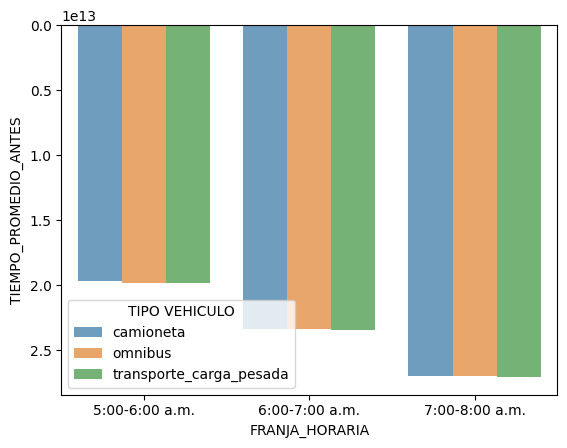

In [ ]:
sns.barplot(x='FRANJA_HORARIA', y='TIEMPO_PROMEDIO_ANTES', hue='TIPO VEHICULO', data=comparacion_tiempos, alpha=0.7)

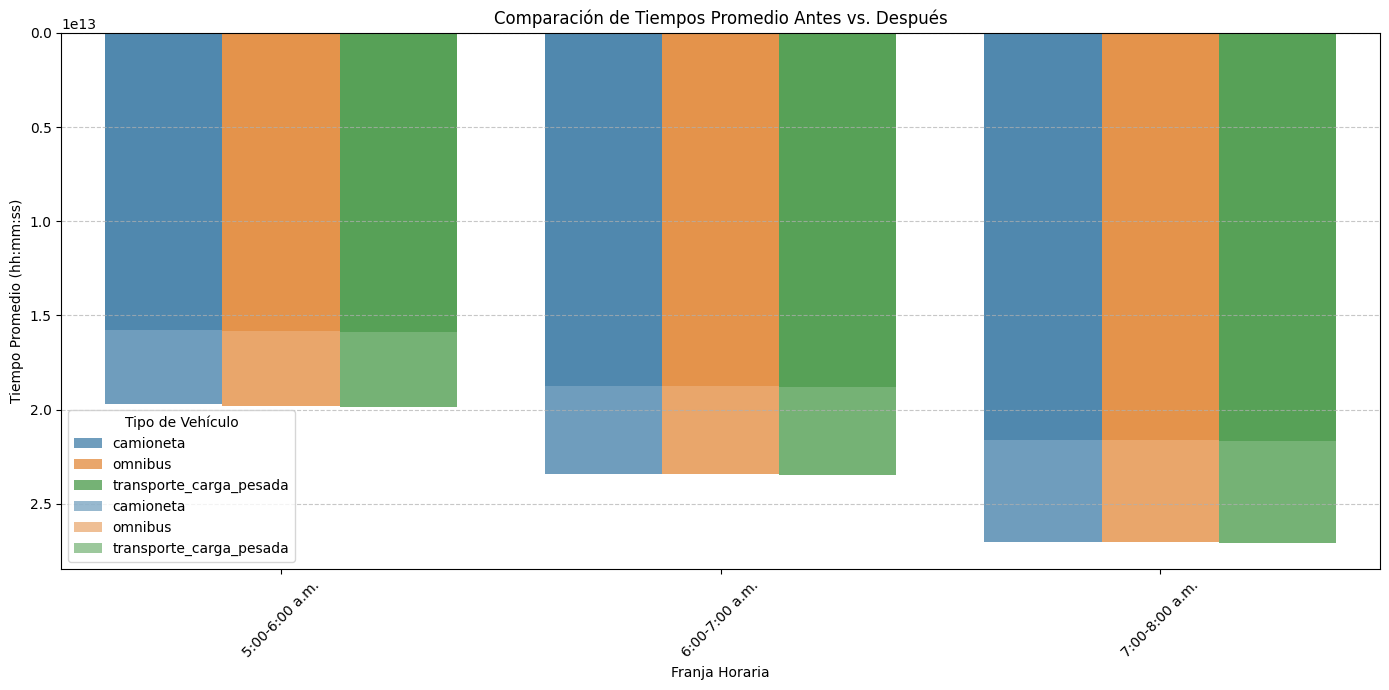

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))

# Graficamos las barras para 'Antes' y 'Después' en la misma gráfica
sns.barplot(x='FRANJA_HORARIA', y='TIEMPO_PROMEDIO_ANTES', hue='TIPO VEHICULO', data=comparacion_tiempos, alpha=0.7, dodge=True)
sns.barplot(x='FRANJA_HORARIA', y='TIEMPO_PROMEDIO_DESPUES', hue='TIPO VEHICULO', data=comparacion_tiempos, alpha=0.5, dodge=True)

# Configuración del gráfico
plt.title('Comparación de Tiempos Promedio Antes vs. Después')
plt.xlabel('Franja Horaria')
plt.ylabel('Tiempo Promedio (hh:mm:ss)')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Vehículo')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()



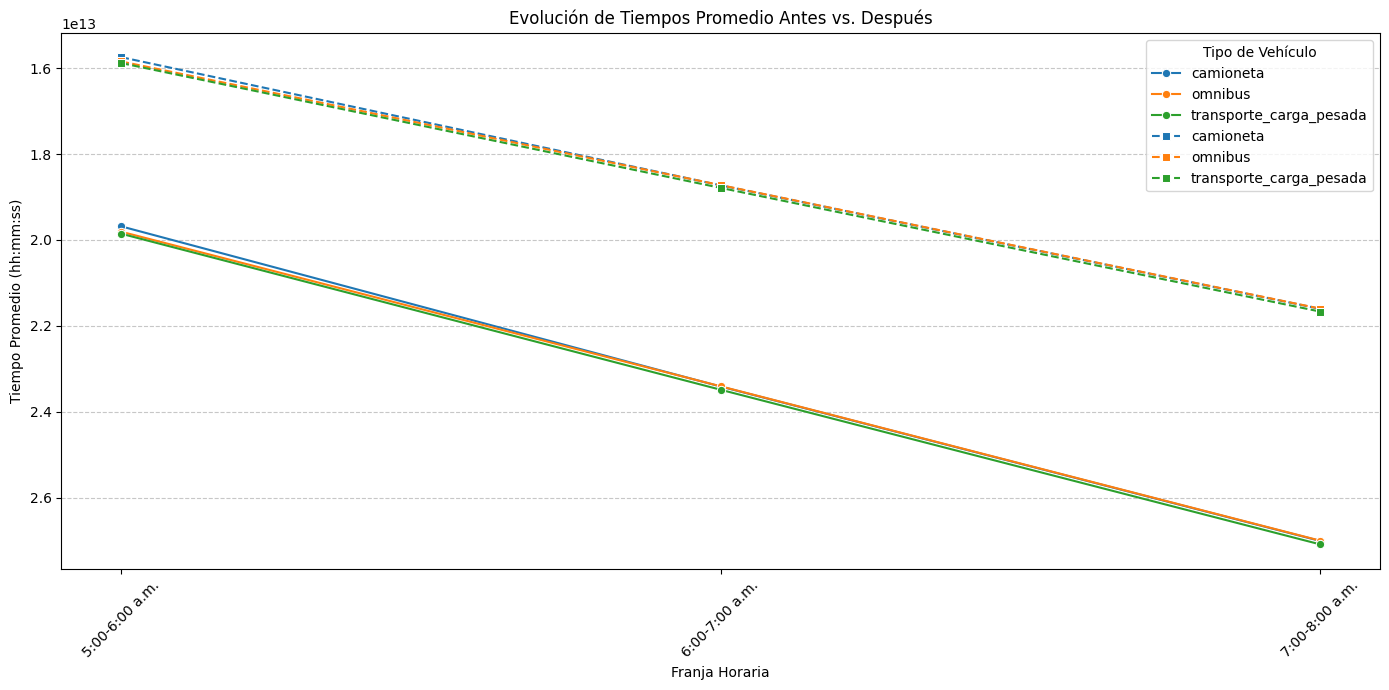

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))

# Graficamos las líneas para 'Antes' y 'Después'
sns.lineplot(x='FRANJA_HORARIA', y='TIEMPO_PROMEDIO_ANTES', hue='TIPO VEHICULO', data=comparacion_tiempos, marker='o', linestyle='-')
sns.lineplot(x='FRANJA_HORARIA', y='TIEMPO_PROMEDIO_DESPUES', hue='TIPO VEHICULO', data=comparacion_tiempos, marker='s', linestyle='--')

# Configuración del gráfico
plt.title('Evolución de Tiempos Promedio Antes vs. Después')
plt.xlabel('Franja Horaria')
plt.ylabel('Tiempo Promedio (hh:mm:ss)')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Vehículo')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [ ]:
# prompt: EXPLICAME QUE HICE EN LA OPTIMIZACION

import pandas as pd
The code performs an analysis of vehicle traffic flow data, simulates an optimization scenario, and visualizes the results. Let's break down the key steps:

**1. Data Preparation:**

- **Data Loading:**  The code starts by loading data from an Excel file (`/content/00 Data.xlsx`) into a pandas DataFrame (`df`).  Ensure this file is accessible in your Colab environment.
- **Data Type Conversion:**  The 'FECHA' column (date) and 'HORA' column (time) are converted to the appropriate datetime and timedelta formats, respectively, using `pd.to_datetime` and `pd.to_timedelta`. This is crucial for proper time-based analysis.
- **Combining Date and Time:** A new column 'FECHA_HORA' is created by combining 'FECHA' and 'HORA' to represent a single datetime value.
- **Creating Time Bins:**  The code divides the data into hourly time bins (5:00-6:00 a.m., 6:00-7:00 a.m., 7:00-8:00 a.m.) using `pd.cut`.  The time is extracted from 'FECHA_HORA' and categorized into the corresponding bin.


**2. Analysis of Current State ("Antes"):**

- **Vehicles per Type and Time Bin:** The code calculates the number of vehicles per type within each time bin using `groupby` and `size()`.
- **Average Entry Times:** It then calculates the average entry time for each vehicle type in each time bin using `groupby` and `mean()`.


**3. Optimization Simulation ("Después"):**

- **Time Reduction:**  The code simulates a 20% reduction in the average entry times (`TIEMPO_PROMEDIO_DESPUES`).  This is just an example and can be changed to reflect different optimization strategies.
- **Vehicle Increase (Hypothetical):** The code also simulates a 20% increase in the number of processed vehicles (`NUMERO_VEHICULOS_DESPUES`).  This is likely a *hypothetical* increase related to the simulated time optimization.  A real-world increase in vehicles processed would likely need to be derived differently.

**4. Comparison and Visualization:**
- DataFrames are merged to create `comparacion_tiempos` and `comparacion_vehiculos` and includes all data points to create the graph.
- The merged data frames are then plotted using seaborn library bar and line plots to display the times and vehicles before and after the simulated optimizations.


**5. Statistical Explanation:**

- **Descriptive Statistics:** The code calculates the mean and standard deviation of waiting times for each vehicle type in each time bin using `mean()` and `std()`.


**In summary, the code analyzes historical traffic data, simulates an optimization, and visualizes the impact of the optimization on average waiting times and traffic volume using descriptive statistics.**

**Key improvements made in the code and potential further steps:**

- **Clearer visualization**:  Changes to the plots have made the before-and-after differences more immediately apparent.  Using different colors, markers, or styles can improve the clarity of any graphs even further.
- **Correct merging**:  The code properly merges data frames before graphing to ensure complete data is shown.
- **Statistical significance**: Consider using statistical tests (e.g., t-tests) to compare average waiting times or volume of vehicles *before and after*.  This would provide statistical validity to the observed differences.
- **Sensitivity analysis**:  Run the optimization simulation with different optimization percentages to see how sensitive the results are to the chosen parameters.

The `calcular_incremento` function is not used in the analysis. You should decide whether or not it is still needed after the changes or completely remove it.
